In [1]:

%matplotlib inline

import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import theano.tensor as tt

x = np.random.randn(100)

with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    sd = pm.Normal('sd', mu=0, sigma=1)

    obs = pm.Normal('obs', mu=mu, sigma=sd, observed=x)
    step = pm.Metropolis()
    trace = pm.sample(5000, step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [mu]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 11 seconds.


In [2]:
trace["mu"]

array([0., 0., 0., ..., 0., 0., 0.])

In [3]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    sd = pm.Normal('sd', mu=0, sigma=1)

    mu_print = tt.printing.Print("mu")(mu)
    sd_print = tt.printing.Print("sd")(sd)

    obs = pm.Normal('obs', mu=mu_print, sigma=sd_print, observed=x)
    step = pm.Metropolis()
    trace = pm.sample(3, step, tune=0, chains=1, progressbar=False)

mu __str__ = 0.0
sd __str__ = 0.0
Only 3 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [sd]
>Metropolis: [mu]
Sampling 1 chain for 0 tune and 3 draw iterations (0 + 3 draws total) took 0 seconds.
sd __str__ = 2.4387709844769696
mu __str__ = 0.0
sd __str__ = 0.0
sd __str__ = 0.0
mu __str__ = -0.8329739362891846
mu __str__ = 0.0
sd __str__ = -0.5012084823369406
mu __str__ = 0.0
sd __str__ = 0.0
sd __str__ = 0.0
mu __str__ = 0.8487920244964425
mu __str__ = 0.0
sd __str__ = -0.46620927971832576
mu __str__ = 0.0
sd __str__ = 0.0
sd __str__ = 0.0
mu __str__ = -2.168375122465918
mu __str__ = 0.0
sd __str__ = 0.0
mu __str__ = 0.0
sd __str__ = 0.0
mu __str__ = 0.0
sd __str__ = 0.0
mu __str__ = 0.0


Redirect output to a string buffer; access the proposed values later on.

Only 5 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [sd]
>Metropolis: [mu]
Sampling 1 chain for 0 tune and 5 draw iterations (0 + 5 draws total) took 0 seconds.


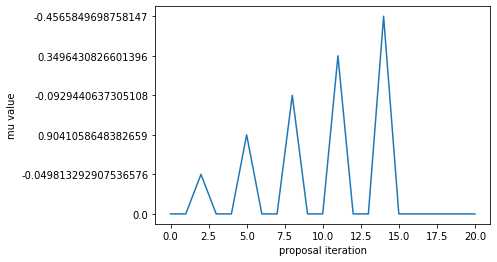

In [4]:
from io import StringIO
import sys

x = np.random.randn(100)

old_stdout = sys.stdout
mystdout = sys.stdout = StringIO()

with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    sd = pm.Normal('sd', mu=0, sigma=1)

    mu_print = tt.printing.Print('mu')(mu)
    sd_print = tt.printing.Print('sd')(sd)

    obs = pm.Normal('obs', mu=mu_print, sigma=sd_print, observed=x)
    step = pm.Metropolis()
    trace = pm.sample(5, step, tune=0, chains=1, progressbar=False) # Make sure not to draw too many samples

sys.stdout = old_stdout

output = mystdout.getvalue().split('\n')
mulines = [s for s in output if 'mu' in s]

muvals = [line.split()[-1] for line in mulines]
plt.plot(np.arange(0, len(muvals)), muvals)
plt.xlabel('proposal iteration')
plt.ylabel('mu value');